# How can Python help YOU? - Notatka prowadzącego

Na dzisiejszym spotkaniu stworzymy skrypt w Pythonie, który automatycznie wygeneruje sprawozdanie, mając tylko folder z obrazkami. Ale przed tym, jak przejdziemy do napisania samego skryptu, musimy nauczyć się pracować z ciągami znaków, plikami tekstowymi, listami, pętlami `for` oraz funkcjami. 


### Agenda spotkania
1. Czym jest $\LaTeX$? 
2. Ciągi znaków i pliki tekstowe
3. Listy i pętla `for`
4. Funkcje
5. Skrypt, tworzący sprawozdanie za pomocą $\LaTeX$

### Wymagane narzędzia:
1. Archiwum z resources
2. Jupyter Lab
3. Visual Studio Code


---

# 1. Czym jest $\LaTeX$

Jeżeli wejdziemy do wikipedii, to zobaczymy jakieś bardzo mądre zdanie: 

> *LaTeX – oprogramowanie do zautomatyzowanego składu tekstu, a także związany z nim język znaczników, służący do formatowania dokumentów tekstowych i tekstowo-graficznych (na przykład: broszur, artykułów, książek, plakatów, prezentacji, a nawet stron HTML).*

Tłumacząc to prościej, jest to inny sposób spojrzenia na przygotowanie dokumentu od znanego dla wszystkich MS Word. Jestem pewien, że nie raz męczyliście się, aby ustawić jakiś obrazek, tabelkę, nagłówek lub po prostu zwykłą listę w MS Word tak, aby to wyglądało sensownie. Wyobraźmy sobie, że w końcu udało wam się ustawić ten nagłówek tak, jak wam się podoba! Super! Ale tu nagle dopisujecie jeszcze jedno zdanie do poprzedniego rozdziału i wszystkie formatowanie wam się posypało... Znajoma sytuacja? Okazało się, że można tego uniknąć. System $\LaTeX$ bierze na siebie odpowiedzialność za to, jak będzie wyglądał wasz dokument, a wy tylko wpisujecie treść. 

Może nadal brzmi skomplikowanie i dziwnie, dlatego spójrzmy na jakiś prosty przykład dokumentu `tex-example-1.tex`:

```latex
\documentclass{article}
% Page margins
\usepackage{geometry}
\newgeometry{inner=2.54cm, outer=2.54cm, top=2.54cm,bottom=2.54cm, bindingoffset=0cm}
% For quotation
\usepackage{csquotes}
% Language support (date, contents, etc.)
\usepackage[polish]{babel}
\usepackage{polski}
\usepackage[utf8]{inputenc}
\usepackage[T1]{fontenc}

\begin{document}

% Pierwsza sekcja
\section{Czym jest \LaTeX?}

Jeżeli wejdziemy do wikipedii, to zobaczymy jakieś bardzo mądre zdanie: 

\begin{displayquote}
\emph{LaTeX – oprogramowanie do zautomatyzowanego składu tekstu, a także związany z nim język znaczników, służący do formatowania dokumentów tekstowych i tekstowo-graficznych (na przykład: broszur, artykułów, książek, plakatów, prezentacji, a nawet stron HTML).}
\end{displayquote}

\noindent Tłumacząc to prościej, jest to inny sposób spojrzenia na przygotowanie dokumentu od znanego dla wszystkich MS Word. Jestem pewien, że nie raz męczyliście się, aby ustawić jakiś obrazek, tabelkę, nagłówek lub po prostu zwykłą listę w MS Word tak, aby to wyglądało sensownie. Wyobraźmy sobie, że w końcu udało wam się ustawić ten nagłówek tak, jak wam się podoba! Super! Ale tu nagle dopisujecie jeszcze jedno zdanie do poprzedniego rozdziału i wszystkie formatowanie wam się posypało\ldots
Znajoma sytuacja? Okazało się, że można tego uniknąć. System \LaTeX bierze na siebie odpowiedzialność za to, jak będzie wyglądał wasz dokument, a wy tylko wpisujecie treść.


% Druga sekcja
\section{Ciągi znaków i  pliki tekstowe?}
\ldots
	
\end{document}
```

Uruchomienie powyższego kodu tworzy tak wyglądający PDF: 

![tex-example-1](https://i.imgur.com/7KtemMR.png)

Później dowiecie się, jak renderować kod $\LaTeX$ do PDF, a na razie nauczmy się tworzyć sam kod $\LaTeX$ za pomocą Pythona.


---


# 2. Ciągi znaków i pliki tekstowe

Jak doskonale rozumiecie, mamy najpierw nauczyć się pracować ze zwykłym tekstem i plikami tekstowymi. Zobaczmy najpierw, jak możemy łączyć różne typy danych z tekstem w Pythonie.

### 2.1 Łączenie ciągów znaków

In [38]:
name = "Vitalii"
year_of_study = 3

In [39]:
"My name is " + name + ", I'm on the " + str(year_of_study) + "rd year of study!"

"My name is Vitalii, I'm on the 3rd year of study!"

In [40]:
f"My name is {name}, I'm on the {year_of_study}rd year of study!"

"My name is Vitalii, I'm on the 3rd year of study!"

In [41]:
"My name is %(my_name)s, I'm on the %(year)srd year of study!" % {"my_name": name, "year": year_of_study}

"My name is Vitalii, I'm on the 3rd year of study!"

### 2.2 Metody na ciągach znaków

W tym odcinku pokaże tylko wybrane metody, natomiast listę wszystkich znajdziecie w dokumentacji.

In [42]:
txt = f"My name is {name}, I'm on the {year_of_study}rd year of study!"
txt

"My name is Vitalii, I'm on the 3rd year of study!"

In [43]:
txt.replace("Vitalii", "XD")

"My name is XD, I'm on the 3rd year of study!"

In [44]:
txt.split()

['My',
 'name',
 'is',
 'Vitalii,',
 "I'm",
 'on',
 'the',
 '3rd',
 'year',
 'of',
 'study!']

In [45]:
txt.upper()

"MY NAME IS VITALII, I'M ON THE 3RD YEAR OF STUDY!"

In [46]:
#help(str)

### 2.3 Znaki modyfikacji

Prawdopodobnie już spotykaliście *znaki modyfikacji* (ang. escape characters) w innych językach programowania, ale zobaczmy jakie są i jak działają w Pythonie:

- `\\` - ukośnik wsteczny;
- `\'` - pojedynczy cudzysłów;
- `\"` - podwójny cudzysłów;
- `\n` - nowa linia; 
- `\r` - zwrot karetki;
- `\t` - tab;
- `\b` - backspace;
- `\ooo` - wartość ósemkowa (tzn. `"\110\145\154\154\157" == "Hello"`);
- `\xhh` - wartość szesnastkowa (tzn. `"\x48\x65\x6c\x6c\x6f" == "Hello"`).


In [47]:
print("\\n symbol should create new line.\nJust like that!")

\n symbol should create new line.
Just like that!


Możemy również tworzyć *surowe ciągi znaków* (ang. row strings), które nie zwracają uwagi na to znaki modyfikacji i przechowują tekst dokładnie tak, jak był on podany na wejściu.

In [48]:
print(r"Unless we use raw sting... \n This time it didn't work -_-")

Unless we use raw sting... \n This time it didn't work -_-


### 2.4 Pliki na komputerze

Dla pracy ze ścieżkami w Pythonie wykorzystujemy moduł `pathlib`. Również skorzystamy z modułu `os` dla zarządzania folderami/plikami. Stwórzmy sobie zmienne `PROJECT_DIR` i `OUTPUT_DIR`, które przydadzą nam się później.

In [49]:
import os
from pathlib import Path

PROJECT_DIR = Path(r"C:\Users\vital\OneDrive\python\PRZ\knml-python-tutorial-private\2-tex-report-generator")
OUTPUT_DIR = PROJECT_DIR.joinpath("results")
OUTPUT_DIR

WindowsPath('C:/Users/vital/OneDrive/python/PRZ/knml-python-tutorial-private/2-tex-report-generator/results')

Za pomocą funkcji `os.listdir()` otrzymujemy listę wszystkich plików i folderów, które znajdują się w podanym folderze. Funkcja ta pomoże nam później otrzymać listę wszystkich obrazków w folderze.

In [50]:
os.listdir(PROJECT_DIR)

['.ipynb_checkpoints',
 'generate-report.html',
 'generate-report.ipynb',
 'generate-report.py',
 'resources',
 'results']

Jak widzimy, w folderze `PROJECT_DIR` niema foldera `OUTPUT_DIR` (results), dlatego stwórzmy go za pomocą funkcji `os.makedirs()`.

In [51]:
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.listdir(PROJECT_DIR)

['.ipynb_checkpoints',
 'generate-report.html',
 'generate-report.ipynb',
 'generate-report.py',
 'resources',
 'results']

In [52]:
OUTPUT_DIR.joinpath("my_file.txt")

WindowsPath('C:/Users/vital/OneDrive/python/PRZ/knml-python-tutorial-private/2-tex-report-generator/results/my_file.txt')

In [53]:
with open(OUTPUT_DIR.joinpath("my_file.txt"), mode="w", encoding="UTF-8") as my_test:
    my_test.write("This is the first line.\nThat should be the second one.")
    my_test.write("Wait a sec, where am I?")

In [54]:
with open(OUTPUT_DIR.joinpath("my_file.txt"), mode="r", encoding="UTF-8") as my_file:
    file_data = my_file.read()
print(file_data)

This is the first line.
That should be the second one.Wait a sec, where am I?


---

### Zadanie 1

(3 - 5 min)

> Używając powyższych konstrukcji za pomocą Pythona stwórz plik tekstowy `moje_cv.txt` o podobnej treści:
> ```text
> My name is Vitalii, I'm from Ternopil, Ukraine. 
> I'm studying Engineering and Data Analysis at Rzeszów University of Technology.
> ``` 
> Tekst może być ułożony inaczej, ale przynajmniej niektóre nazwy powinno się dać zmienić z poziomu Pythona, np. imię, miasto, kraj, itd.


---

# 3. Listy i pętla `for`

Na prostym przykładzie zobaczmy podstawową zasadę działania listy i pętli `for`.

In [55]:
shopping_list = ["bananas", "cake", "fish", "biscuits"]
for product in shopping_list:
    print(f"\nLooking for {product}...")
    if product == "fish":
        print("\tIt smells terrible, skipping fish.")
    elif product == "cake":
        print("\tAll cakes are sold out :(\n\tMust add candies to the list!")
        shopping_list.append("candies")
    else:
        print(f"\tPurchusing {product}.")


Looking for bananas...
	Purchusing bananas.

Looking for cake...
	All cakes are sold out :(
	Must add candies to the list!

Looking for fish...
	It smells terrible, skipping fish.

Looking for biscuits...
	Purchusing biscuits.

Looking for candies...
	Purchusing candies.


Po tym przykładzie już chyba łatwo domyślić się, że lista będzie nam potrzebna dla przechowywania wszystkich obrazków, które będziemy dodawać do sprawozdania za pomocą pętli.

Teraz zobaczmy trochę więcej szczegółów na temat list w Pythonie.

### 3.1 Lists and strings indexing and slicing

In [56]:
import string

letters = string.ascii_lowercase
letters

'abcdefghijklmnopqrstuvwxyz'

In [57]:
list(letters)[6:11]

['g', 'h', 'i', 'j', 'k']

In [58]:
list(letters)
list(letters)[0]
list(letters)[0:10]
list(letters)[6:11]
list(letters)[:10]
letters[:10]

'abcdefghij'

> Co zrobi `list(letters[:10])`? 

> Jak wypisać ich w przeciwnym kierunku? 

> Jak wyciągnąć ostatni element?

In [59]:
list(letters[:10])
list(letters)[10:]
list(letters)[9:0]
list(letters)[9:0:-1]
list(letters)[9::-1]
list(letters)[len(letters) - 1]
list(letters)[-1]

'z'

In [60]:
list(range(0, 10))
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

> Jak wypisać taką listę w przeciwnym kierunku? 

In [61]:
list(range(10)).reverse()  # Does it work?
x = list(range(10))
x.reverse()
x

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

In [62]:
list(range(10, 0))
list(range(10, 0, -1))
list(range(9, -1, -1))

[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

### 3.2 Funkcji `enumerate()` i `zip()`

In [63]:
for number in range(10):
    print(number, letters[number])

0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j


In [64]:
list(zip(range(10), letters[:10]))

[(0, 'a'),
 (1, 'b'),
 (2, 'c'),
 (3, 'd'),
 (4, 'e'),
 (5, 'f'),
 (6, 'g'),
 (7, 'h'),
 (8, 'i'),
 (9, 'j')]

In [65]:
for number, letter in zip(range(0, 10), letters[:10]):
    print(number, letter)

0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j


In [66]:
for number, letter in enumerate(letters[:10]):
    print(number, letter)

0 a
1 b
2 c
3 d
4 e
5 f
6 g
7 h
8 i
9 j


---

### Zadanie 2

(5 - 7 min)

> 1. Poprosić użytkownika o podanie kilku nazw przedmiotów.
> 2. Stworzyć listę złożoną z takiej samej ilości losowych liczb.
> 3. Używając znanych poleceń, wypisać oceny obok każdego przedmiotu (jak na przykładzie poniżej).
> 4. Stworzyć plik `oceny.txt` w którym wypisać oceny do każdego przedmiotu. 
> 
> 
> Oczekiwany widok pliku `oceny.txt`: 
> ```text
> Analiza Matematyczna - 5
> Język Angielski - 4
> Bussiness Intelligence - 3
> Matematyka Wyżasza dla Inżynierów - 4
> Sztuczna Inteligencja - 5
> ```


---

# 4. Funkcje 

Dlaczego funkcje są potrzebne i gdzie je stosujemy dowiemy się w trakcie tworzenia głównego skryptu. Natomiast w tym miejscu chciałbym tylko pokazać, czym jest i jak działa funkcja w Pythonie.

Definiujemy funkcję w następujący sposób:

```python
def some_function(parameter1, parameter2, parameter3="I'm optional!"):
    # ...
    # Any code here
    # ... 

    # Just to show, how parameters work: 
    print("parameter1 = ", parameter1)
    print("parameter2 = ", parameter2)
    print("parameter3 = ", parameter3)

    # We can return some value from function with return keyword:
    return "I was returned!"
```

In [67]:
def some_function(parameter1, parameter2, parameter3="I'm optional!"):
    # ...
    # Any code here
    # ... 

    # Just to show, how parameters work: 
    print("parameter1 = ", parameter1)
    print("parameter2 = ", parameter2)
    print("parameter3 = ", parameter3)

    # We can return some value from function with return keyword:
    return "I was returned!"

In [68]:
some_function("Frightened", "Fox")
some_function("Frightened", "Fox")
some_function("Frightened", "Fox", "Not frightened anymore")

parameter1 =  Frightened
parameter2 =  Fox
parameter3 =  I'm optional!
parameter1 =  Frightened
parameter2 =  Fox
parameter3 =  I'm optional!
parameter1 =  Frightened
parameter2 =  Fox
parameter3 =  Not frightened anymore


'I was returned!'

---

### Zadanie 3

(2 - 3 min)

> 1. Napisać funkcję `func(x, y, c=0)` w Python, która odpowiada poniższej funkcji matematycznej:
> $$ f(x, y) = \frac{\sin\left(\sqrt{x^2 + y^2 + c^2}\right)}{\sqrt{x^2 + y^2 + c^2}} $$
> 2. Sprawdzić wartości funkcji w takich punktach:
>     - `func(x=1, y=1, c=0)` $\approx 0.698$
>     - `func(x=0, y=0, c=1)` $\approx 0.841$
> 3. Używając tej funkcji narysować wykres za pomocą jednego z podanych poniżej sposobów.

### Część wspólna dla obu implementacji

In [70]:
import numpy as np

c = 1e-5
limits = 25

v_func = np.vectorize(func)
xs = np.arange(-limits, limits, 0.25)
ys = np.arange(-limits, limits, 0.25)
xs, ys = np.meshgrid(xs, ys)
zs = v_func(xs, ys, c)

### Implementacja w Matplotlib

Jest wygodny tym, że już macie zainstalowaną taką paczkę (jeżeli wykonywaliście poprzednie laboratoria i instalowaliście paczkę `seaborn`). Natomiast jego wykresy wyglądają minimalnie gorzej i są statyczne. 

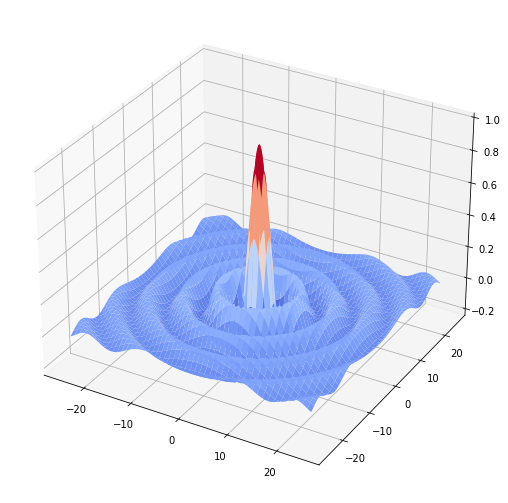

In [71]:
import matplotlib.pyplot as plt
from matplotlib import cm

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(16, 9))

surf = ax.plot_surface(xs, ys, zs, cmap=cm.coolwarm,
                       linewidth=0, antialiased=True)

### Implementacja w Plotly

Wykresy są bardzo ładne, ale tą paczkę trzeba zainstalować osobno wpisując polecenie: 
```python
!pip install plotly
```

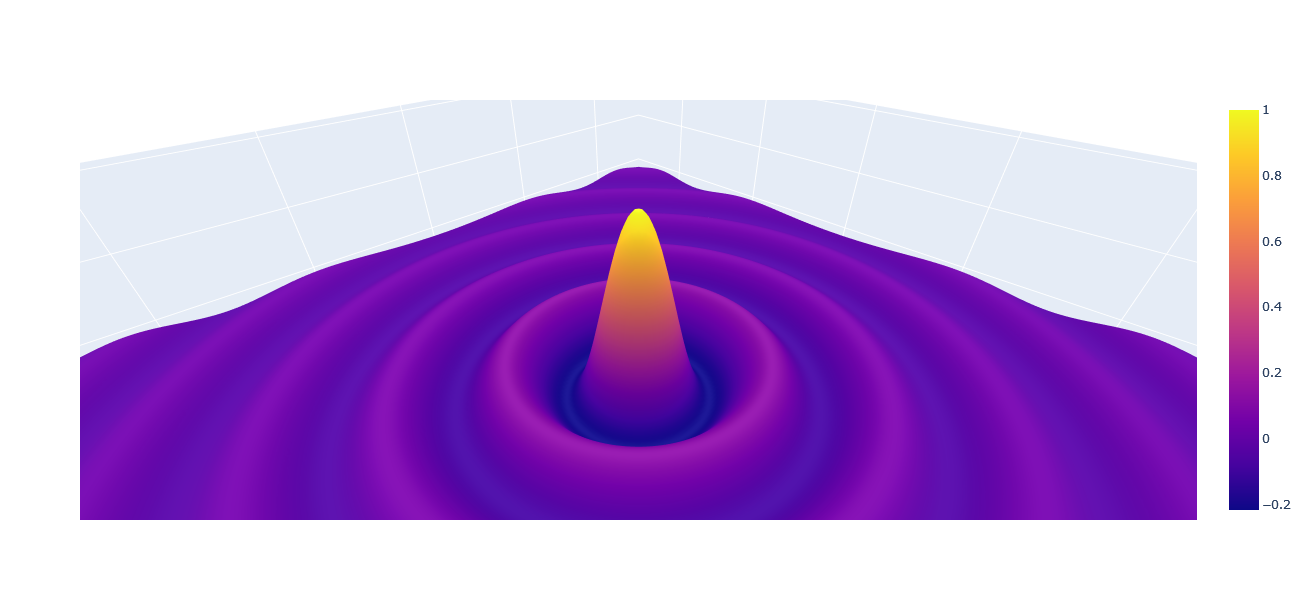

In [72]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Surface(x=xs, y=ys, z=zs)])

fig.update_layout(width=1000, height=600, scene_aspectmode='manual',
                  scene_aspectratio=dict(x=4, y=4, z=1))

# 5. Skrypt, tworzący sprawozdanie za pomocą $\LaTeX$

Dlatego, aby taki skrypt zadziałał potrzebujemy zainstalować system $\LaTeX$.

### Instalacja MikTeX

Otwieramy plik **plik** i zostawiamy wszystkie opcje na ustawieniach domyślnych, z wyjątkiem jednej:

**Install missing packages on the fly? YES**

![paczki](https://i.imgur.com/4ANEmK0.png)

In [73]:
# Imports and constants
import subprocess

# TODO: Directories for each report
RESOURCES_DIR = PROJECT_DIR.joinpath("resources")
SPR_1_DIR = RESOURCES_DIR.joinpath("sprawozdanie-1")
SPR_2_DIR = RESOURCES_DIR.joinpath("sprawozdanie-2")
SPR_3_DIR = RESOURCES_DIR.joinpath("sprawozdanie-3")

In [74]:
# Version 1

header = r"""\documentclass{article}

% Page margins
\usepackage{geometry}
\newgeometry{inner=2.54cm, outer=2.54cm, top=2.54cm,bottom=2.54cm, bindingoffset=0cm}

% Language support (date, contents, etc.)
\usepackage[polish]{babel}
\usepackage{polski}
\usepackage[utf8]{inputenc}

% For images (\includegraphics)
\usepackage{graphicx}

\begin{document}
"""

footer = r"\end{document}"

figure = r"""
\begin{figure}
    \centering
    \includegraphics[width=0.8\textwidth]{C:/Users/vital/OneDrive/python/PRZ/knml-python-tutorial-private/2-tex-report-generator/sprawozdanie-1/21-19-22-20-92 (1).png}
    \caption{%(figure_caption)s}
\end{figure}
"""

figure2 = r"""
\begin{figure}
    \centering
    \includegraphics[width=0.8\textwidth]{C:/Users/vital/OneDrive/python/PRZ/knml-python-tutorial-private/2-tex-report-generator/sprawozdanie-1/21-19-22-20-92 (1).png}
    \caption{%(figure_caption)s}
\end{figure}
"""

content = (
        header +
        figure % {"figure_caption": "This is my ddd"} +
        figure2 % {"figure_caption": "Another caption"} +
        footer)

In [75]:
# Version 2 

def add_figure(path, caption):
    figure = r"""
    \begin{figure}
        \centering
        \includegraphics[width=0.8\textwidth]{%(path)s}
        \caption{%(figure_caption)s}
    \end{figure}
    """ % {"path": path.as_posix(), "figure_caption": caption}
    return figure


content = (
        header +
        add_figure(SPR_1_DIR.joinpath("21-19-22-20-92 (1).png"), "My image") +
        add_figure(SPR_1_DIR.joinpath("21-19-22-20-96 (4).png"), "Works good") +
        footer)

In [76]:
# Version 3

captions = ["Image 1", "XD Image", "Image 3", "Image 4", "Image 5"]
content = header
for filename, caption in zip(os.listdir(SPR_1_DIR), captions):
    content += add_figure(SPR_1_DIR.joinpath(filename), caption)
content += footer

In [77]:
# Version 4
def create_tex_code(directory, captions, latex_head, latex_tail):
    content = latex_head
    for filename, caption in zip(os.listdir(directory), captions):
        content += add_figure(directory.joinpath(filename), caption)
    content += latex_tail
    return content


content = create_tex_code(
    directory=SPR_1_DIR,
    captions=["Image 1", "XD Image", "Image 3", "Image 4", "Image 5"],
    latex_head=header,
    latex_tail=footer
)

In [78]:
# Common part for version 1, 2, 3 and 4

with open('./results/cover.tex', 'w', encoding="UTF-8") as f:
    f.write(content)

command = ['pdflatex', '-interaction', 'nonstopmode', '-output-directory', './results/', './results/cover.tex']
proc = subprocess.Popen(command)
proc.communicate()

retcode = proc.returncode
os.unlink('./results/cover.log')
if not retcode == 0:
    os.unlink('./results/cover.pdf')
    raise Exception('Error {} executing command: {}'.format(retcode, ' '.join(command)))

In [79]:
# Version 5

def generate_report(output_directory, filename, content):
    filepath = os.path.join(output_directory, os.path.splitext(filename)[0])
    tex_file_path = filepath + ".tex"
    with open(tex_file_path, 'w', encoding="UTF-8") as f:
        f.write(content)

    command = ['pdflatex', '-interaction', 'nonstopmode', '-output-directory', output_directory, tex_file_path]
    proc = subprocess.Popen(command)
    proc.communicate()

    retcode = proc.returncode
    os.unlink(filepath + ".log")
    if not retcode == 0:
        os.unlink(filepath + ".pdf")
        raise Exception('Error {} executing command: {}'.format(retcode, ' '.join(command)))


content = create_tex_code(
    directory=SPR_1_DIR,
    captions=["Test 5", "XD 5", "Image 3", "Image 4", "Image 5"],
    latex_head=header,
    latex_tail=footer
)
generate_report(
    output_directory=OUTPUT_DIR,
    filename="cover",
    content=content
)

In [80]:
os.listdir(SPR_2_DIR)

['21-19-20-48-65.png',
 '21-19-20-48-68.png',
 '21-19-20-48-72.png',
 '21-19-20-48-77.png',
 '21-19-20-48-81.png',
 '21-19-20-48-87.png',
 '21-19-20-48-92.png',
 '21-19-20-48-97.png',
 '21-19-20-49-01.png',
 '21-19-20-49-06.png',
 '21-19-20-49-10.png',
 '21-19-20-49-14.png',
 '21-19-20-49-18.png',
 '21-19-20-49-21.png']

In [81]:
captions_14 = []
for i, filename in enumerate(os.listdir(SPR_2_DIR)):
    print(f"Image {i + 1}: {filename}")
    captions_14.append(f"Image {i + 1}")

captions_14 = [
    f"Image {i + 1}" for i, _ in enumerate(os.listdir(SPR_2_DIR))
]
captions_14

Image 1: 21-19-20-48-65.png
Image 2: 21-19-20-48-68.png
Image 3: 21-19-20-48-72.png
Image 4: 21-19-20-48-77.png
Image 5: 21-19-20-48-81.png
Image 6: 21-19-20-48-87.png
Image 7: 21-19-20-48-92.png
Image 8: 21-19-20-48-97.png
Image 9: 21-19-20-49-01.png
Image 10: 21-19-20-49-06.png
Image 11: 21-19-20-49-10.png
Image 12: 21-19-20-49-14.png
Image 13: 21-19-20-49-18.png
Image 14: 21-19-20-49-21.png


['Image 1',
 'Image 2',
 'Image 3',
 'Image 4',
 'Image 5',
 'Image 6',
 'Image 7',
 'Image 8',
 'Image 9',
 'Image 10',
 'Image 11',
 'Image 12',
 'Image 13',
 'Image 14']

In [82]:
content = create_tex_code(
    directory=SPR_2_DIR,
    captions=captions_14,
    latex_head=header,
    latex_tail=footer
)
generate_report(
    output_directory=OUTPUT_DIR,
    filename="cover",
    content=content
)

In [ ]:
# Final version
import os
import subprocess
from pathlib import Path

PROJECT_DIR = Path(r"C:\Users\vital\OneDrive\python\PRZ\knml-python-tutorial-private\2-tex-report-generator")
OUTPUT_DIR = PROJECT_DIR.joinpath("results")

RESOURCES_DIR = PROJECT_DIR.joinpath("resources")
SPR_1_DIR = RESOURCES_DIR.joinpath("sprawozdanie-1")
SPR_2_DIR = RESOURCES_DIR.joinpath("sprawozdanie-2")
SPR_3_DIR = RESOURCES_DIR.joinpath("sprawozdanie-3")

with open(RESOURCES_DIR.joinpath("tex-templates/header.tex"), mode="r", encoding="UTF-8") as header_file:
    header = header_file.read()

footer = r"\end{document}"


def add_figure(path, caption):
    figure = r"""
    \begin{figure}
        \centering
        \includegraphics[width=0.8\textwidth]{%(path)s}
        \caption{%(figure_caption)s}
    \end{figure}
    """ % {"path": path.as_posix(), "figure_caption": caption}
    return figure


def create_tex_code(directory, captions, latex_head, latex_tail):
    content = latex_head
    for filename, caption in zip(os.listdir(directory), captions):
        content += add_figure(directory.joinpath(filename), caption)
    content += latex_tail
    return content


def generate_report(output_directory, filename, content):
    filepath = os.path.join(output_directory, os.path.splitext(filename)[0])
    tex_file_path = filepath + ".tex"
    with open(tex_file_path, 'w', encoding="UTF-8") as f:
        f.write(content)

    command = ['pdflatex', '-interaction', 'nonstopmode', '-output-directory', output_directory, tex_file_path]
    proc = subprocess.Popen(command)
    proc.communicate()

    retcode = proc.returncode
    os.unlink(filepath + ".log")
    if not retcode == 0:
        os.unlink(filepath + ".pdf")
        raise Exception('Error {} executing command: {}'.format(retcode, ' '.join(command)))


captions = [
    f"Image {i + 1}" for i, _ in enumerate(os.listdir(SPR_3_DIR))
]

content = create_tex_code(
    directory=SPR_3_DIR,
    captions=captions,
    latex_head=header,
    latex_tail=footer
)
generate_report(
    output_directory=OUTPUT_DIR,
    filename="cover",
    content=content
)

# Pomysły na rozwój tego skryptu

- dodać możliwość zmiany nazwy pliku, autorów, daty, itd. bez konieczności edycji preambuły $\LaTeX$;
- dodać moduł `argparse`, żeby można było wszystko uruchamiać z poziomu konsoli i nie edytować skryptu;
- dodać możliwość pomijania podpisów zdjęć (caption) oraz możliwość podania wszystkich podpisów za pomocą innego pliku `.txt` lub `.csv`;
- dodać automatyczne dopasowanie szerokości zdjęcia w zależności od rozmiarów i orientacji tego zdjęcia.

# Python 3.11 is here!

Co nowego? 
1. Nowa wersja jest o 10-60% szybsza* od poprzedniej wersji (3.10). 
2. Podkreślenie dokładnego miejsca wystąpienia błędu.
3. ... i jeszcze dużo bardziej zaawansowanych rzeczy, o których możecie przeczytać na stronie [python.org](https://python.org).


**Chodzi tutaj o "pure Python", czyli kod napisany w "czystym Pythonie", bez takich bibliotek jak Numpy, które uruchamiają kod, napisany w C/C++.*